In [48]:
import pandas as pd
import os
import scipy.stats as stats
pwd = os.getcwd()
dataset = pd.read_csv(pwd+"/score_updated.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


In [49]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

1.Null hypothesis:There is no significant difference in the average marks betwwen students who study for more than 6 ours and those who study for lees than 6
2.Alternative hypothesis:There is a significant difference in the average marks betwwen students who study for more than 6 ours and those who study for lees than 6
3.alpha(Significance level)
4.t-statsic and  value
5.compare and interpret

In [50]:
alpha = float(0.05)

In [51]:
less_6 =dataset[dataset["Hours"]<=6]['Scores']
greater_6 = dataset[dataset['Hours']>6]['Scores']
## I seperated the dataset in to two parts which one consist of study hours less then or equal to 6hrs
##and the other one with study hours being greater than 6 hrs

In [52]:
##Calculate t statistic and p value
from scipy.stats import ttest_ind
t_statsic,p_valuee = ttest_ind(less_6,greater_6)
print("T test results")
print("The t-statistic is:",t_statsic)
print("The p-value is:",p_valuee)

T test results
The t-statistic is: -15.690257742884747
The p-value is: 5.360218764843392e-28


In [53]:
##Comparism and interpretation
print("Assuming that the two groups have equal variances")
if p_valuee< alpha:
    print("We reject the null hypothesis and conclude that there is a signincant difference in avareage marks between the two groups")
else:
    print("We fail to reject the null hyphothesis and conclude that there is no enough information to show that there is a significant difference")

Assuming that the two groups have equal variances
We reject the null hypothesis and conclude that there is a signincant difference in avareage marks between the two groups


We repeat the same test but without assuming that the two groups have equal variances

F test procedure
1.Null hypothesis: Variance1 and Variance2 are equal
2.Alternative hypothesis Variance1 and Variance2 are not equal
3.f stat and p value
4. alpha
5.Compare and interpret


In [54]:
from scipy.stats import levene
f_stat, p_value_f = levene(less_6,greater_6)
print("F test results")
print("The F-statistic is:",f_stat)
print("The p-value is:",p_value_f)

F test results
The F-statistic is: 7.1911918683309555
The p-value is: 0.008654078347599115


In [55]:
if p_value_f< alpha:
    print("We reject the null hypothesis and conclude that the variances are not equal")
    t_statsic,p_valuee = ttest_ind(less_6,greater_6,equal_var=False)
    print("T test results")
    print("The t-statistic is:",t_statsic)
    print("The p-value is:",p_valuee)
    if p_valuee< alpha:
       print("We reject the null hypothesis and conclude that there is a signincant difference in avareage marks between the two groups")
    else:
       print("We fail to reject the null hyphothesis and conclude that there is no enough information to show that there is a significant difference")

else:
    print("we fail to reject the null hypothesis and conclude that the variances are equal")
    t_statsic,p_valuee = ttest_ind(less_6,greater_6)
    print("T test results")
    print("The t-statistic is:",t_statsic)
    print("The p-value is:",p_valuee)
    if p_valuee< alpha:
        print("We reject the null hypothesis and conclude that there is a signincant difference in avareage marks between the two groups")
    else:
        print("We fail to reject the null hyphothesis and conclude that there is no enough information to show that there is a significant difference")

We reject the null hypothesis and conclude that the variances are not equal
T test results
The t-statistic is: -16.72532597275376
The p-value is: 6.545422571902648e-30
We reject the null hypothesis and conclude that there is a signincant difference in avareage marks between the two groups


We Want to check if the marks are nomrlly distributed
since this is not a large data set i used a shapiro wilks test to test whether the data comes from a normal distribution

1.Null hypothesis:Data is normally distributed
2.alt hypo:Data is not Normally distributed

In [56]:
Scores =dataset['Scores']
from scipy.stats import shapiro
shapiro_statstic, shapiro_p_value =shapiro(Scores)
print("The Shapiro wilks test results")
print("The Shapiro statstics is:",shapiro_statstic)
print("The shapiro p value is:",shapiro_p_value)

if shapiro_p_value<alpha:
    print("We reject the null hypothesis.This means that the data significantly deviates from normality and therefor the data is not normally distributed")
else:
    print("We fail to reject the null hypothesis.This mean that the is no enough information to show evidence against the assumption of normality and therefor we conclude that the data is normally distibuted")


The Shapiro wilks test results
The Shapiro statstics is: 0.9519261116296355
The shapiro p value is: 0.0014601240979284173
We reject the null hypothesis.This means that the data significantly deviates from normality and therefor the data is not normally distributed


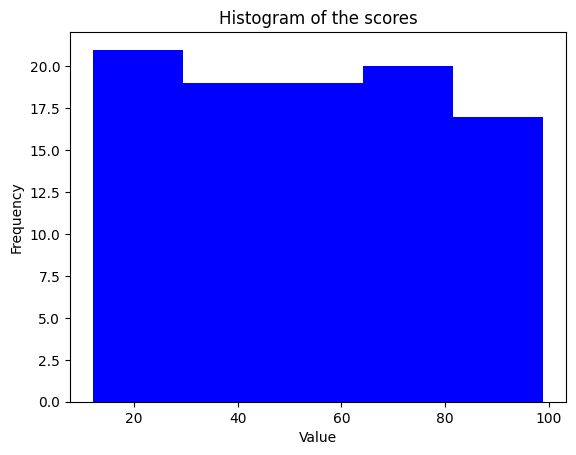

In [57]:
import matplotlib.pyplot as plt
plt.hist(Scores,bins=5, color='blue')
plt.title('Histogram of the scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
